# Shopping Apps, Rating for Google Play Store and Apple AppStore Users

<img src="https://image.freepik.com/free-vector/cartoon-delivery-man-brings-goods-customer-from-laptop-vector-illustration-concept-with-online-shopping-services_46527-344.jpg" />

## Introduction

Users download apps for various purposes. Given that there is a rise in the usage of online shopping due to the Covid-19 pandemic, improvement of shopping experience has become more important then before. With that in mind, what are the important features we have to look out for to improve a shopping app?

## Problem Statement

- How do the app ratings differ across different shopping apps?
- Is there any specific group of users we can look out for to improve the app?
- Are there any specific improvement we can work on to further improve user experience of the app?

To explore and answer the above questions, we will scrap reviews from Google Play Store and Apple AppStore and conduct analysis and modelling.

## Executive Summary

The data is webscrapped from the Shopping category in Google Play Store and Apple Appstore, 8 apps reviews were chosen for this project (Amazon, Wish, ASOS, Lazada, Ebay, Shoppee, AliExpress, Carousell). The data used was exclusive dated in 2020 only as majority of the data scrapped are from in 2020. Data cleaning was done by removing stopwords, lemmatized and Vectorized to the raw data to create bag-of-words. 

There will be 3 steps to our modelling process, with the first step classifying whether the text is a good or bad review, followed by classifying the reviews into categories created through topic modelling to group them into different subgroups.

A few classification model were used, namely LogisticRegression, MultinomialNB, SGDClassifier, RandomForest, ADABoost. LogisticRegression give us the best results in classifying our data and thus used as the final model. 

As the data set is quite big, RandomizedSearch was used instead of Gridsearch to find the best hyperparameter.



### Content Summary
- Webscrapped reviews of 8 apps from Google Play Store & Apple App Store
- Data Cleaning 
  - Removing data not in year 2020
  - Removing emoji and punctuations
  - Removing non english words
  - Lemmatization
  - Compound score calculation using VaderSentiment
- EDA
  - Plotting distribution of features
  - Topic modelling of good reviews
  - Topic modelling of bad reviews
- Machine Learning Model 
  - LogisticRegression
  - MultinomialNB
  - SGDClassifier
  - RandomForest
  - ADABoost
- Deep Learning Model
  - Convolutional Neural Network
  
### Key Findings
- Most complains are on Bad User Experience, while most good reviews are on the good overall service of the App, which is rather vague
- There is more negative reviews in 9am - 3pm period, and on Tuesdays
- There is quite a number of reviews being 1 word, or otherwise rated wrongly by the user, (e.g. review: Excellent, Rating: 1)
- The multiclass model seems to be predicting better compared to what the topic modeling originally set the topic was, which is quite interesting as the model is able to differentiate the categories clearly base on the keywords.

### Metrics
Using the following metrics to evaluate the models:
- ROC AUC curve(for Binary Classification)
  -  The ROC AUC cruve is able to tell how much model is capable of distinguishing between classes.ranging from 0 to 1, with 1 being perfectly classified.
- MCC Score
  - The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.
- Kappa Score(For multiclassification)
  - Cohen’s Kappa is a quantitative measure of reliability for two raters that are rating the same thing, corrected for how often that the raters may agree by chance. ranging from 0 to 1, with 1 being good.
  
- f1 score weighted
  - The F1 Scores are calculated for each label and then their average is weighted by support - which is the number of true instances for each label. It can result in an F-score that is not between precision and recall

### Final Results
**Classification (Good & Bad Reviews)**
- LogisticRegression
  - Train data AUC: 0.947
  - Test data AUC: 0.945
  - MCC Score: 0.729
  
  
**Multi Classification (Bad Review categories)**
- LogisticRegression
    - Train Data f1 weighted score: 0.867	
    - Test Data f1 weighted score: 0.862	
    - MCC Score: 0.798336	
    - Kappa Score: 0.796888


**Multi Classification (Good Review categories)**
- LogisticRegression
    - Train Data f1 weighted score: 0.937	
    - Test Data f1 weighted score: 0.944	
    - MCC Score: 0.907	
    - Kappa Score: 0.906

### Limitations
- The data set is mostly collected in the month of August and September, which means the model is able to predict this period better, but not in predicting past data. 
- More data could be collected, as there is a major lack of Apple Appstore reviews compared to Google Play Store

### Further research
- Try to use Compound score gathered from VaderSentiment to do the classification instead, as we know there is some misclassified post by users. which hopefully give us a better accuracy.

### Content
1. Webscrap data
2. Data Cleaning
3. EDA
4. Model Part 1, Classification (Good & Bad Reviews)
5. Model Part 2, Multi Classification (Bad Review categories) 
6. Model Part 3, Multi Classification (Good Review categories)
7. Deep Learning Model

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('pastel')
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from ipywidgets import widgets

#setting cufflinks to link iplot() method to df
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


from time import time

from PIL import Image
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import re
import spacy
from spacymoji import Emoji
from nltk.corpus import stopwords, words
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer as lemmatize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import sys
from pprint import pprint

# Gensim
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

import pyLDAvis.gensim

from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer, CorpusFromParsedDocuments, Scalers
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
df = pd.read_csv('../data/cleaned_reviews.csv')

In [3]:
df.head()

rating                 date      app   store  \
0       5  2020-09-16 20:26:28  shoppee  google   
1       4  2020-09-16 20:13:46  shoppee  google   
2       5  2020-09-16 20:13:05  shoppee  google   
3       4  2020-09-16 20:11:18  shoppee  google   
4       5  2020-09-16 20:08:54  shoppee  google   

                                              review  \
0    Orders mostly came early and products are good.   
1                                Good and convenient   
2                                      Gd...........   
3  My first purchase experience...Happy with purc...   
4                A lot of items at a very good deal.   

                        clean_content               adj  \
0       order come early product good             good    
1                     good convenient  good convenient    
2                                 NaN               NaN   
3  purchase experience happy purchase      first happy    
4                  lot item good deal             good    

                            noun   verb emoji  neg_score  neu_score  \
0                 order product   come    NaN        0.0      0.707   
1                            NaN    NaN   NaN        0.0      0.408   
2                            NaN    NaN   NaN        0.0      1.000   
3  purchase experience purchase     NaN   NaN        0.0      0.714   
4                 lot item deal     NaN   NaN        0.0      0.715   

   pos_score  compound_score language  
0      0.293          0.4404       en  
1      0.592          0.4404       en  
2      0.000          0.0000       cy  
3      0.286          0.3400       en  
4      0.285          0.4927       en

In [4]:
df.shape

(78929, 15)

## Removing null values

In [5]:
df.isna().sum()[df.isna().sum() != 0]

clean_content     4244
adj              18153
noun             25517
verb             35816
emoji            73151
dtype: int64

In [6]:
df= df[df['clean_content'].notna()]
df.reset_index(inplace = True, drop = True)

In [7]:
df.isna().sum()[df.isna().sum() != 0]

adj      14433
noun     22056
verb     31922
emoji    69984
dtype: int64

In [8]:
print(f'Number of rows entry in data: {df.shape[0]}')

Number of rows entry in data: 74685


In [9]:
df.notna().sum()[df.notna().sum() != df.shape[0]]

adj      60252
noun     52629
verb     42763
emoji     4701
dtype: int64

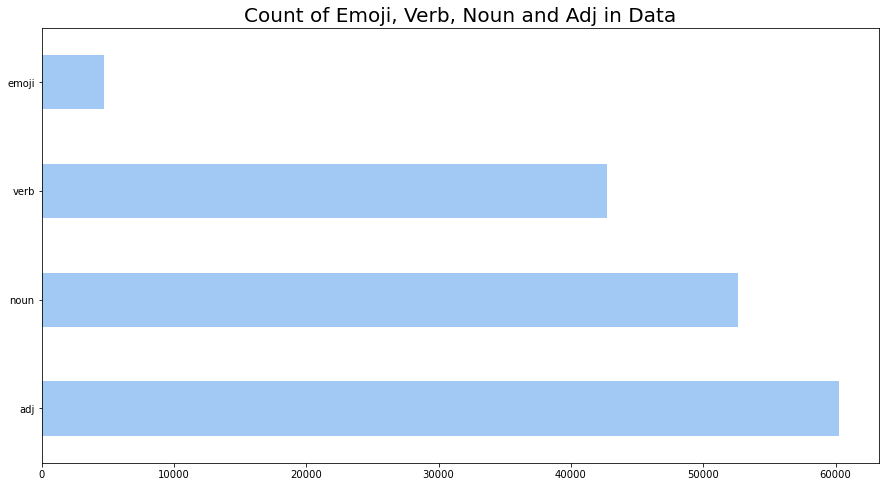

In [10]:
plt.figure(figsize = (15, 8))
plt.title('Count of Emoji, Verb, Noun and Adj in Data', fontsize = 20)
df.notna().sum()[df.notna().sum() != df.shape[0]].plot(kind = 'barh');

**Remarks**
- There is very little reviews that uses Emoji, which means we cannot rely heavily on emojis to do the prediction.

## Check for non English Languages

In [11]:
df = df[df['language'] == 'en']
df.shape

(57516, 15)

In [12]:
# Sorting out categories that are considered english language
english_list = ['en']

for i in df.index:
    if df['language'][i] not in english_list:
        df.drop(index = i, inplace = True)

print(f'Number of rows that are considered English: {df.shape[0]}')

Number of rows that are considered English: 57516


## Checking rating and compound score mismatched

In [13]:
#Checking bad ratings with high positive scores
df_bad_mis = df[df['rating'] <=3][df['pos_score'] > 0.4][['rating', 'pos_score', 'review']]
print(f'Total rows of wrong rated bad ratings: {df_bad_mis.shape[0]}')
df_bad_mis.head(10)

Total rows of wrong rated bad ratings: 390


rating  pos_score                                             review
1038       3      0.672                          Great shopping experience
1493       2      0.534  great improvement no more freeze!!! but hope i...
1627       3      0.409                    Fast delivery So far quite good
1630       3      0.420             Slow,in receiving.but good in service.
1733       1      0.477               Candy game crash. Please fix. Thanks
2465       1      0.744                                       Good quality
2808       3      0.859                               User friendly. Good.
2843       1      0.457  Price increase, have some nice games but poor ...
3137       3      0.608                  Good to have fun online shopping.
3424       1      0.583                                 Love buy in shopee

In [14]:
# Removing wrongly rated reviews
df.drop(index = df_bad_mis.index, inplace = True)
df.shape

(57126, 15)

In [15]:
#Checking Good ratings with high negative scores
df_good_mis = df[df['rating'] > 3][df['neg_score'] > 0.4][['rating', 'neg_score', 'review']]
print(f'Total rows of wrong rated good ratings: {df_good_mis.shape[0]}')
df_good_mis.head(10)

Total rows of wrong rated good ratings: 156


rating  neg_score                                             review
231        4      0.574                                  Sometime very lag
1422       5      0.403                       Sometime don't get free coin
2028       4      0.505  Returning the faulty products r very difficult...
2551       5      0.677                                          low price
3026       5      0.688                                         No issues.
4091       5      0.556                              Lags sometimes though
4489       5      0.423                                 Fast and no hassle
5045       5      0.412                           Low price. Fast delivery
5100       5      0.688                                       Lower price.
6008       4      0.608                              Disappointed at time.

In [16]:
# Removing wrongly rated reviews
df.drop(index = df_good_mis.index, inplace = True)
print(f'Number of rows left: {df.shape[0]}')

Number of rows left: 56970


**Remarks**
- Removed all the reviews that can be considered positive but was rated badly by user, as it will make it difficult for the model to predict later

## Changing Date Data to datetime dtype

In [17]:
df['date'] = df['date'].astype('datetime64')

## Creating new columns for eda

### New time columns

In [18]:
df['month'] = df.date.dt.month
df['dayofweek'] = df.date.dt.dayofweek + 1 #adding 1 as the data starts from 0 for monday, this is to avoid confusion
df['hour'] = df.date.dt.hour
df['minute'] = df.date.dt.minute

### Length of text columns

In [19]:
df['text_len'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

# EDA

## Distribution of App, Rating, Store, Month and DayofWeek

In [20]:
def plot_countplots(df, features):
    nrows = int(np.ceil(len(features)/2))
    fig, ax = plt.subplots(nrows, 2, figsize=(18,6*nrows))
    ax = ax.ravel()
    for i in range(len(features)):
        ax[i].set_title(f'Count of {features[i]} across Shopping reviews', fontdict = {'fontsize': 10})
        sns.countplot(x = features[i], data = df, ax = ax[i]);

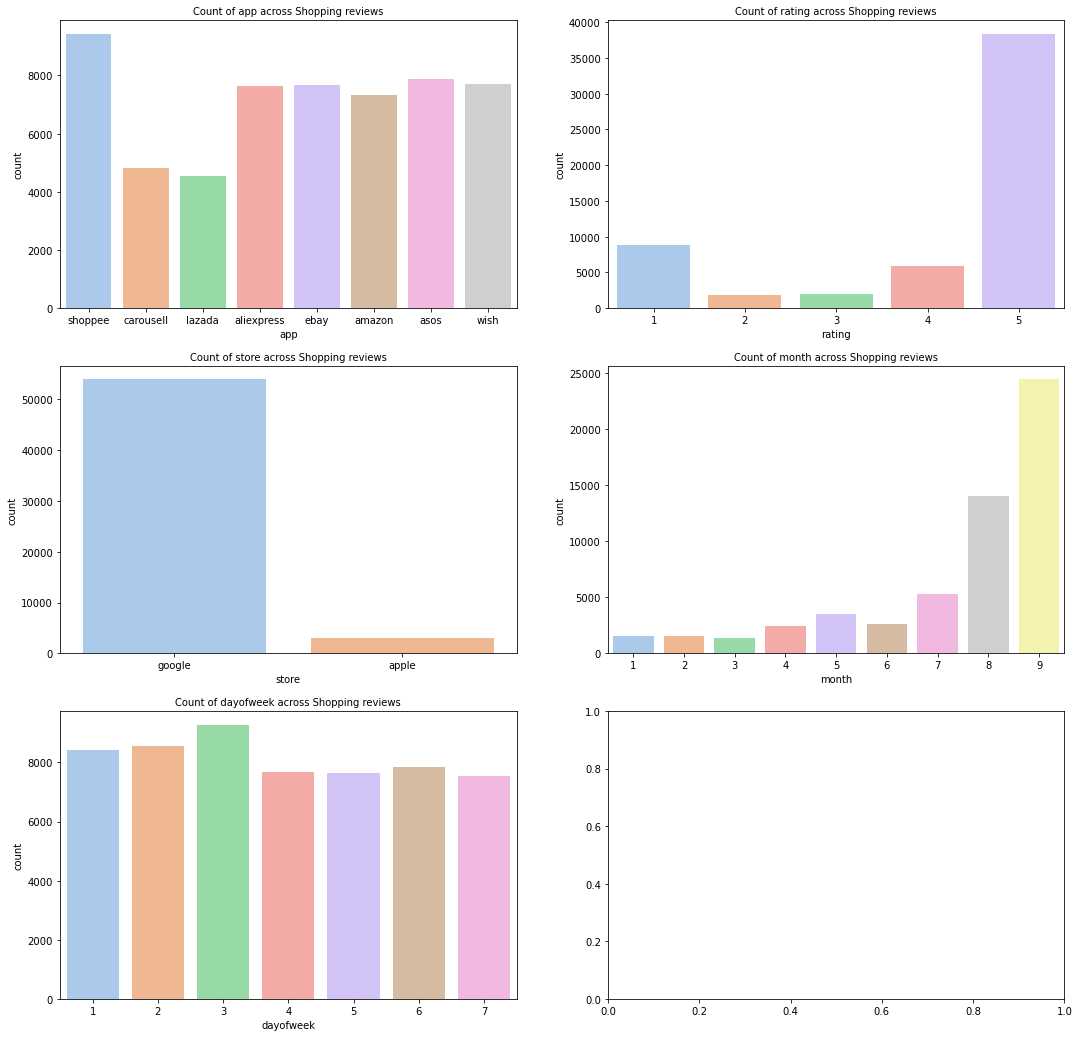

In [21]:
plot_countplots(df, ['app', 'rating', 'store', 'month', 'dayofweek'])

**Remarks**
- There is a imbalance data in the ratings, with significantly more positive reviews as compared to negative reviews
- There is more reviews data in the September month as compared to the earlier period, which is due to the data collection period
- Interestingly, there is more reviews on Wednesday as compared to other days

## Boxplot of App across Month

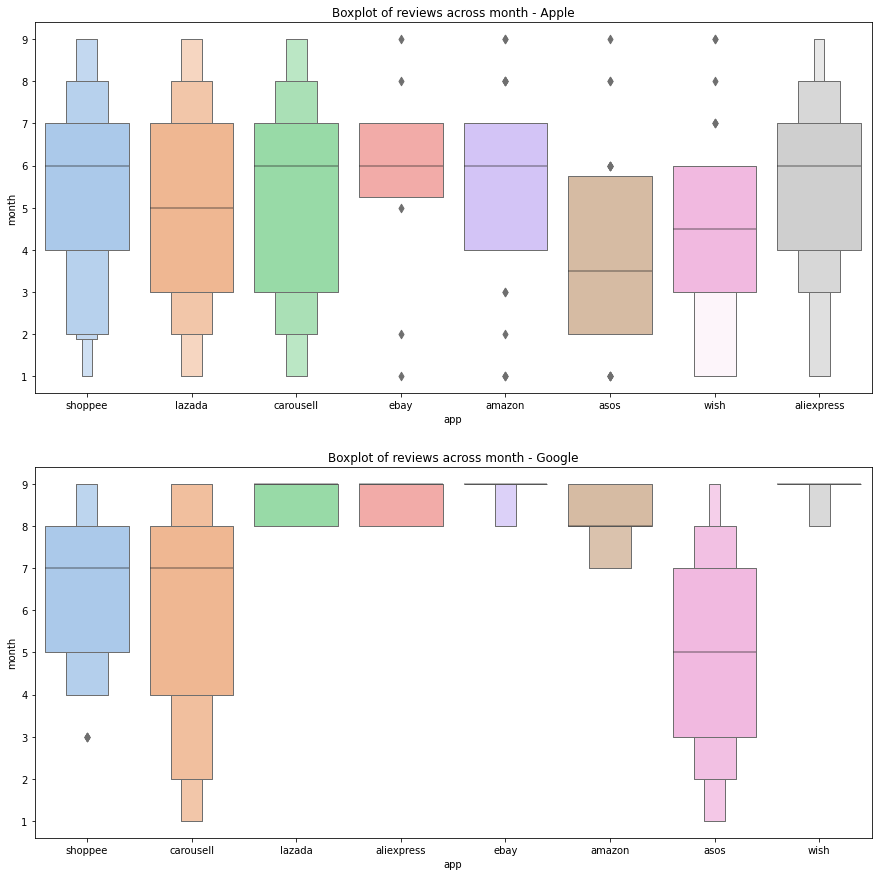

In [22]:
fig,ax = plt.subplots(2,1, figsize = (15, 15))
ax[0].set_title('Boxplot of reviews across month - Apple')
sns.boxenplot(x = 'app', y = 'month', data = df[df['store'] == 'apple'], ax = ax[0])

ax[1].set_title('Boxplot of reviews across month - Google')
sns.boxenplot(x = 'app', y = 'month', data = df[df['store'] == 'google'], ax = ax[1]);

**Remarks**
- The data collected is more spread across the time period in Apple Appstore as compared to Google Playstore

## TimeSeries Analysis of Data

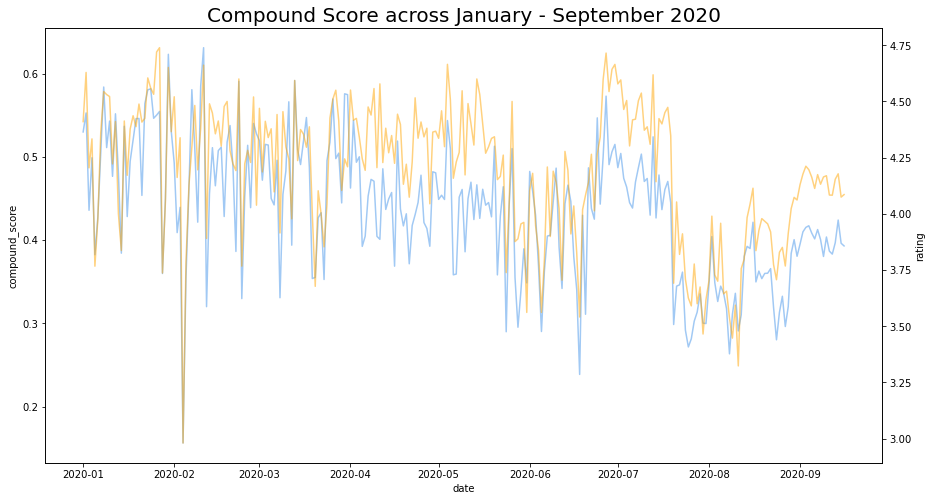

In [23]:
plt.figure(figsize = (15,8))
plt.title('Compound Score across January - September 2020', fontsize = 20)
ax = sns.lineplot(x = 'date' , y = 'compound_score', data = df.resample('D', on = 'date').mean())
g2 = ax.twinx()
sns.lineplot(x = 'date' , y = 'rating', data = df.resample('D', on = 'date').mean(), ax = g2, color = 'orange', alpha = 0.5);

**Remarks**
- The compound score from VaderSentiment and ratings are closely similar, therefore will use compound score for certain visualisation

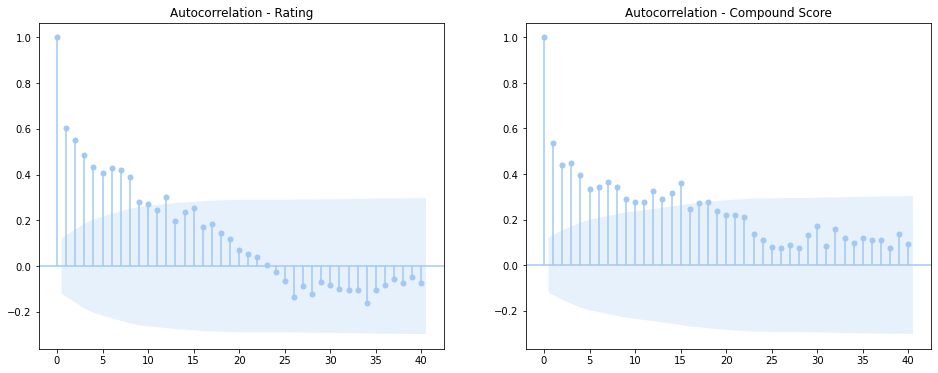

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_acf(df.resample('D', on = 'date').mean()['rating'], lags = 40, ax = ax[0], title = 'Autocorrelation - Rating')
plot_acf(df.resample('D', on = 'date').mean()['compound_score'], lags = 40, ax = ax[1], title = 'Autocorrelation - Compound Score');

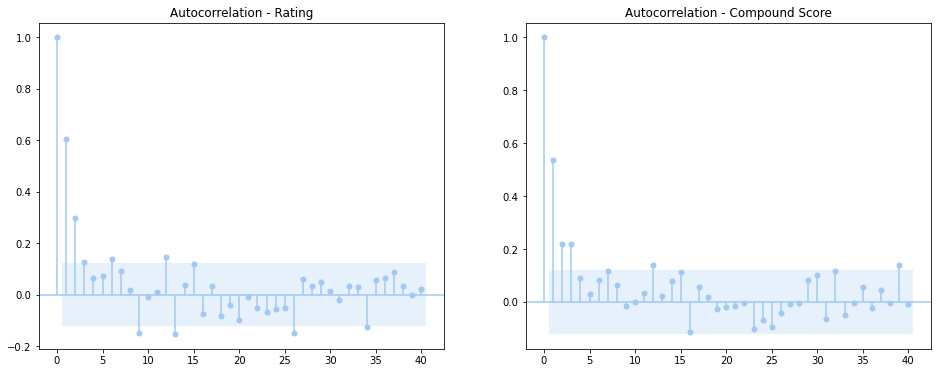

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_pacf(df.resample('D', on = 'date').mean()['rating'], lags = 40, ax = ax[0], title = 'Autocorrelation - Rating')
plot_pacf(df.resample('D', on = 'date').mean()['compound_score'], lags = 40, ax = ax[1], title = 'Autocorrelation - Compound Score');

**Remarks**
- from the plots above, it can be interpreted that there is a seasonality of 1 week(7days), and around 1 month(26, 28 days)

## Distribution by Hour, DayofWeek

In [26]:
def plot_countplots_time(df, date_features, scoring):
    nrows = int(np.ceil(len(date_features)))
    fig,ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    
    for i in range(len(date_features)):
        ax[i].set_title(f'Count of {date_features[i]} across Shopping reviews {scoring}', fontdict = {'fontsize': 20})
        g = sns.countplot(x = date_features[i] , data = df, ax=ax[i])
        g2 = g.twinx()
        
        g2 = sns.pointplot(x = date_features[i],
                           y = scoring, 
                           data = df ,
                           ax=g2, color = 'black')
        
        plt.legend(labels = [f'{scoring} mean'])
    plt.show()

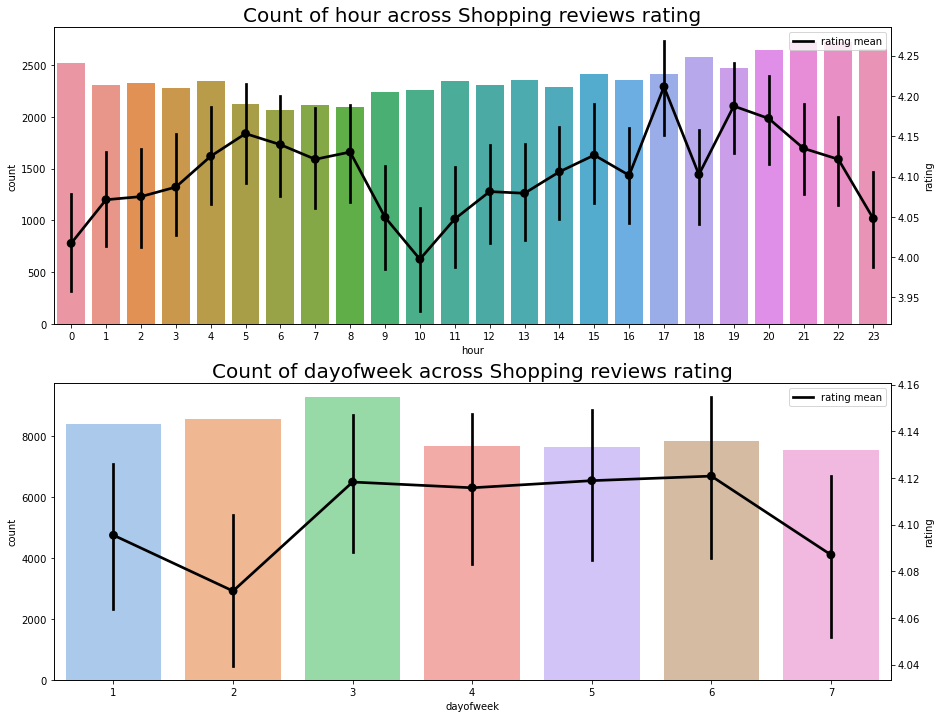

In [27]:
plot_countplots_time(df, ['hour', 'dayofweek'], 'rating')

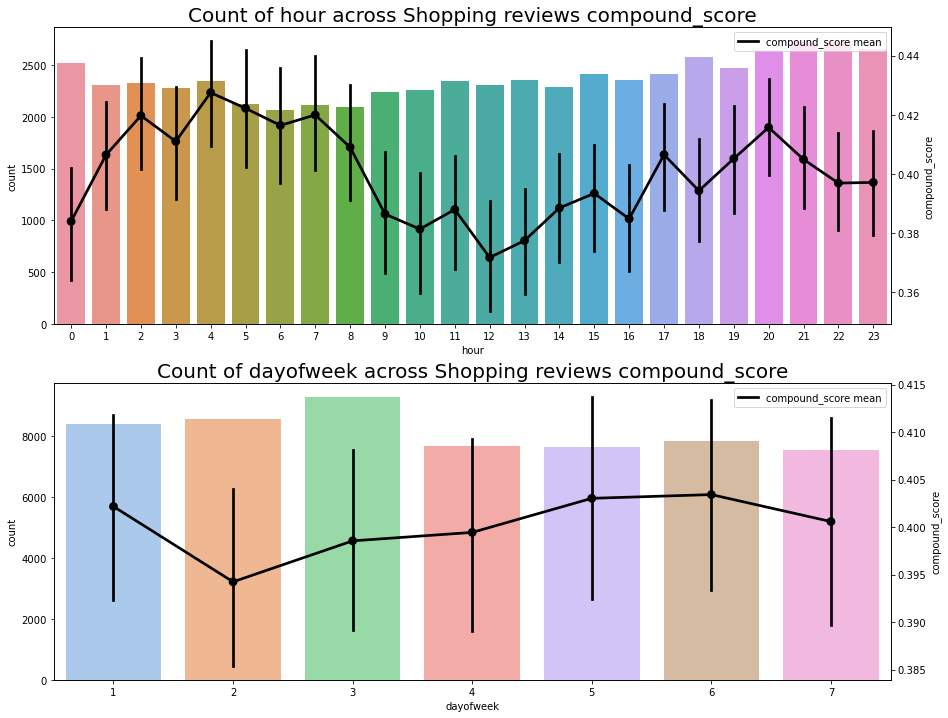

In [28]:
plot_countplots_time(df, ['hour', 'dayofweek'], 'compound_score')

**Remarks**
- More negative reviews are seen in 9am - 3pm period
- More negative reviews on Tuesdays

## Distribution of Wordlen, Wordcount

In [29]:
def dist_plotting(features):
    nrows = len(features)
    fig, ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    plt.subplots_adjust(hspace = 0.2)
    
    for i in range(len(features)):
        ax[i].set_title(f'Distribution of {features[i]} of reviews')
        sns.histplot(data = df[df['rating'] > 3], x = features[i], color = 'b', ax = ax[i], label = 'good_review')
        sns.histplot(data = df[df['rating'] <= 3], x = features[i], alpha = 0.7, ax = ax[i], color = 'r', label = 'bad_review')
        ax[i].set_xlim([0,df[features[i]].quantile(q = 0.99)])
        ax[i].legend()

Average text length of good reviews: 63
Average text length of bad reviews: 180
Average word count of good reviews: 12
Average word count of bad reviews: 33


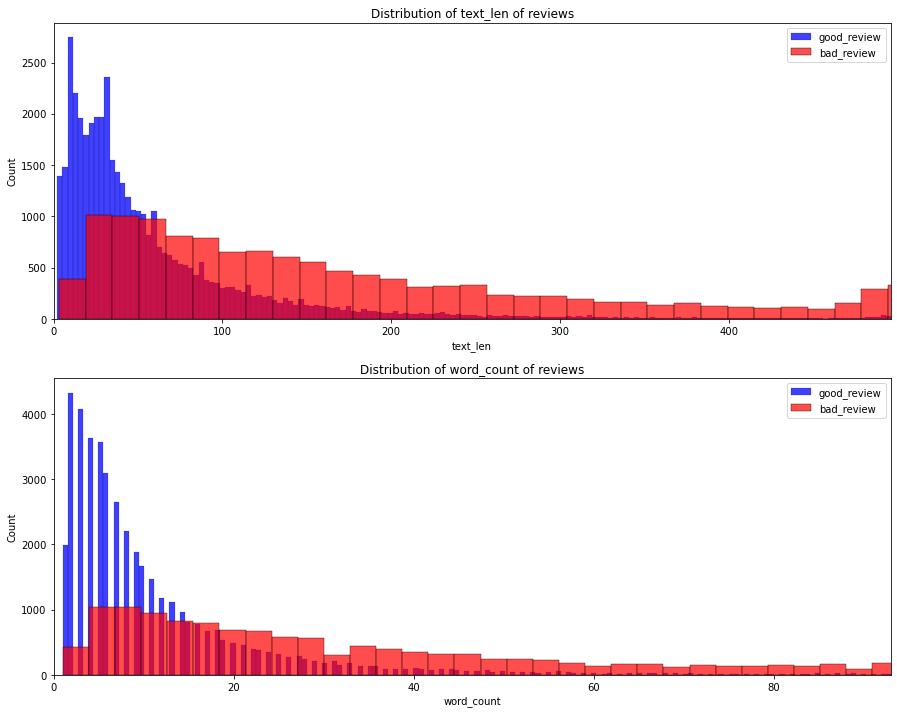

In [30]:
print(f'Average text length of good reviews: {round(df.text_len[df.rating > 3].mean())}')
print(f'Average text length of bad reviews: {round(df.text_len[df.rating <= 3].mean())}')
print(f'Average word count of good reviews: {round(df.word_count[df.rating > 3].mean())}')
print(f'Average word count of bad reviews: {round(df.word_count[df.rating <= 3].mean())}')

dist_plotting(['text_len', 'word_count'])

**Remarks**
- Bad reviews tend to have more word count as compared to good reviews

## Distribution of Adj, Noun, Verb and Emoji

In [31]:
def dist_plotting_word(features):
    nrows = len(features)
    fig, ax = plt.subplots(nrows,1, figsize = (15, 5*nrows))
    plt.subplots_adjust(hspace = 0.4)
    
    for i in range(len(features)):
        ax[i].set_title(f'Distribution of {features[i]} of reviews')
        sns.histplot(data = df[df['rating'] > 3], x = round(df[df['rating'] > 3][features[i]].str.len()), color = 'b', ax = ax[i], label = 'good_review')
        sns.histplot(data = df[df['rating'] <= 3], x = round(df[df['rating'] <= 3][features[i]].str.len()), alpha = 0.7, ax = ax[i], color = 'r', label = 'bad_review')
        ax[i].set_xlim([0,round(df[df['rating'] > 3][features[i]].str.len()).quantile(q = 0.99)])
        ax[i].legend()

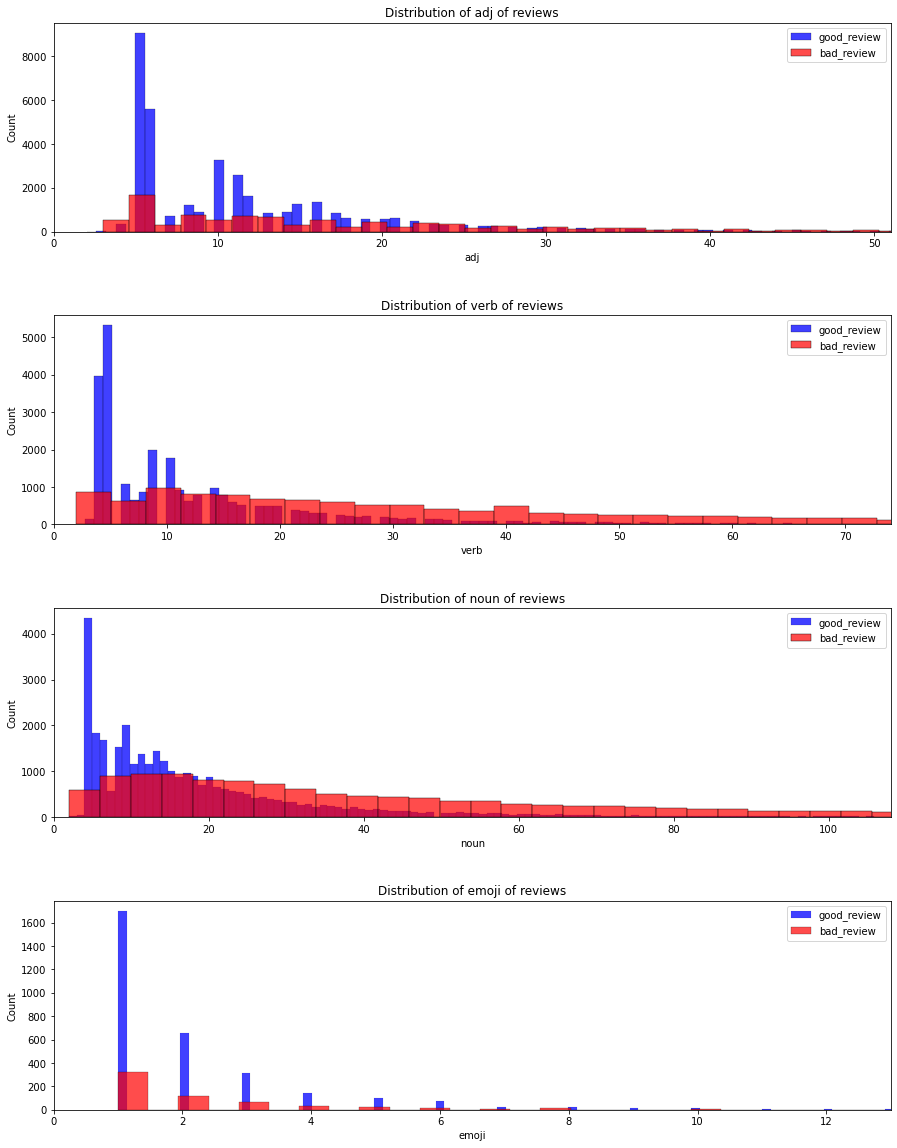

In [32]:
dist_plotting_word(['adj', 'verb', 'noun', 'emoji'])

## Boxplot of Rating across apps

In [33]:
def boxplot_interact(scoring):
    
    y0 = df.loc[df['app'] == 'shoppee'][scoring]
    y1 = df.loc[df['app'] == 'carousell'][scoring]
    y2 = df.loc[df['app'] == 'lazada'][scoring]
    y3 = df.loc[df['app'] == 'aliexpress'][scoring]
    y4 = df.loc[df['app'] == 'ebay'][scoring]
    y5 = df.loc[df['app'] == 'amazon'][scoring]
    y6 = df.loc[df['app'] == 'asos'][scoring]
    y7 = df.loc[df['app'] == 'wish'][scoring]
    
    trace0 = go.Box(y=y0,name = 'shoppee',marker = dict(color = 'rgb(214, 12, 140)',))
    trace1 = go.Box(y=y1,name = 'carousell',marker = dict(color = 'rgb(0, 128, 128)',))
    trace2 = go.Box(y=y2,name = 'lazada',marker = dict(color = 'rgb(10, 140, 208)',))
    trace3 = go.Box(y=y3,name = 'aliexpress',marker = dict(color = 'rgb(12, 102, 14)',))
    trace4 = go.Box(y=y4,name = 'ebay',marker = dict(color = 'rgb(10, 0, 100)',))
    trace5 = go.Box(y=y5,name = 'amazon', marker = dict(color = 'rgb(100, 0, 10)',))
    trace6 = go.Box(y=y6,name = 'asos',marker = dict(color = 'rgb(255, 212, 59)',))
    trace7 = go.Box(y=y7,name = 'wish',marker = dict(color = 'rgb(100, 100, 100)',))
    
    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
    
    layout = go.Layout(title = f"Sentiment {scoring} Boxplot of app")
                    
    fig = go.Figure(data=data,layout=layout)
    fig.update_layout(autosize=False,width=1000,height=500,
                      margin=dict(l=50,r=50,b=100,t=100,pad=4),paper_bgcolor="white")
    
    iplot(fig, filename = f'Sentiment {scoring} Boxplot of app', image_width=600, image_height=400,)

In [34]:
boxplot_interact('rating')

## Boxplot of Compound score across apps

In [35]:
boxplot_interact('compound_score')

**Remarks**
- Amazon app seems to have quite a fair bit of ratings across 1-5, followed by Carousell, then Lazada.
- Shoppee and Ebay have more positive review by looking at the compound score

## Distribution of Keywords

In [36]:
def get_top_n_words(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer().fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

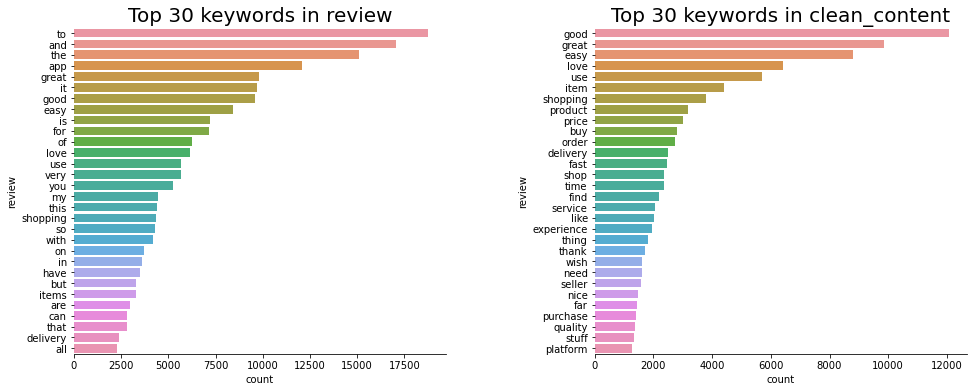

In [37]:
get_top_n_words(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

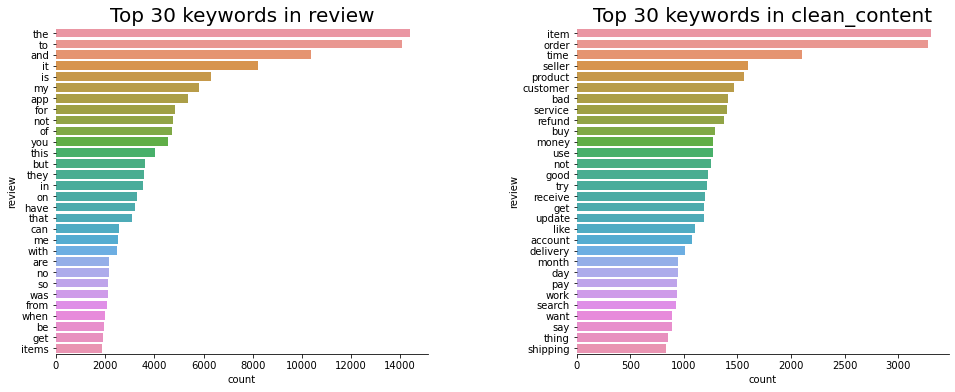

In [38]:
get_top_n_words(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- Keywords in the top chart are good, great,easy, use
- keywords in the bad reviews top chart are time, order, service

## Distribution of Bigram Keywords

In [39]:
def get_top_n_bigrams(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer(ngram_range=(2, 2)).fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} Bigrams keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

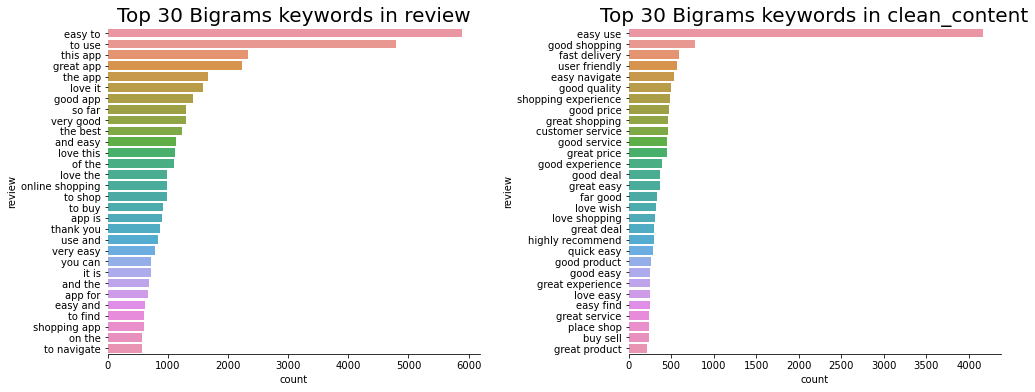

In [40]:
get_top_n_bigrams(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

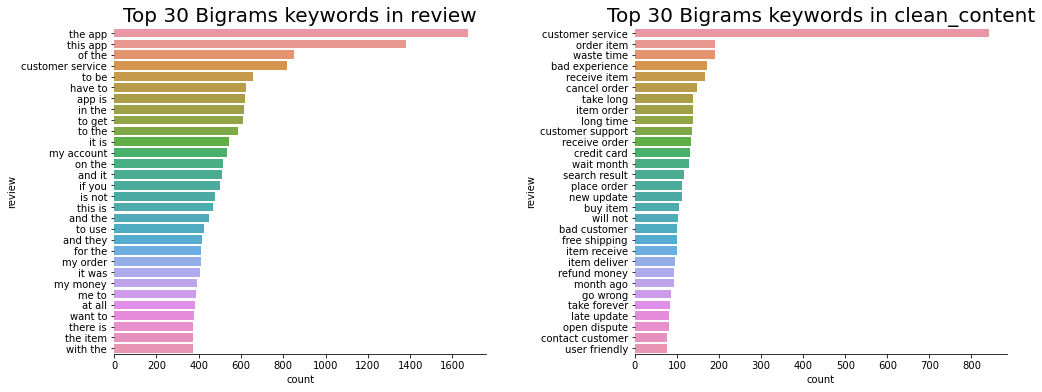

In [41]:
get_top_n_bigrams(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- looking at the bigrams, Customer service seems to be very important factor in giving a bad review
- whereas 'Easy Use' came up as top for good review, which need further reasearch to see what it means

## Distribution of Trigram Keywords

In [42]:
def get_top_n_trigrams(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer(ngram_range=(3, 3)).fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} Trigram keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

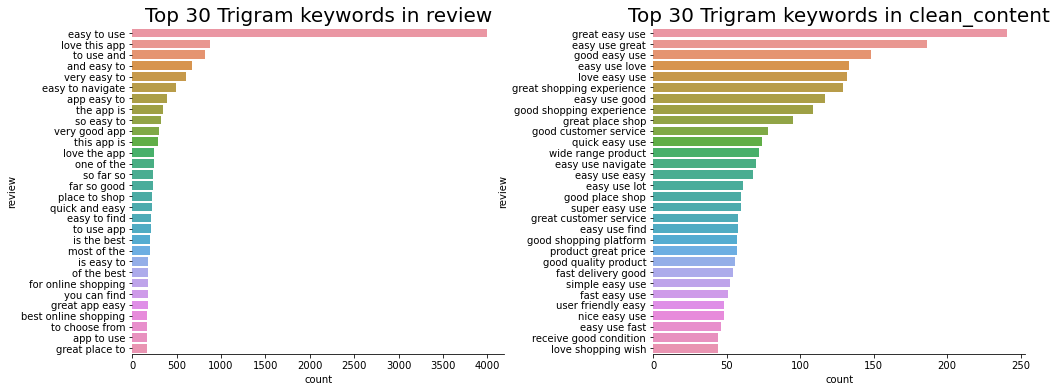

In [43]:
get_top_n_trigrams(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

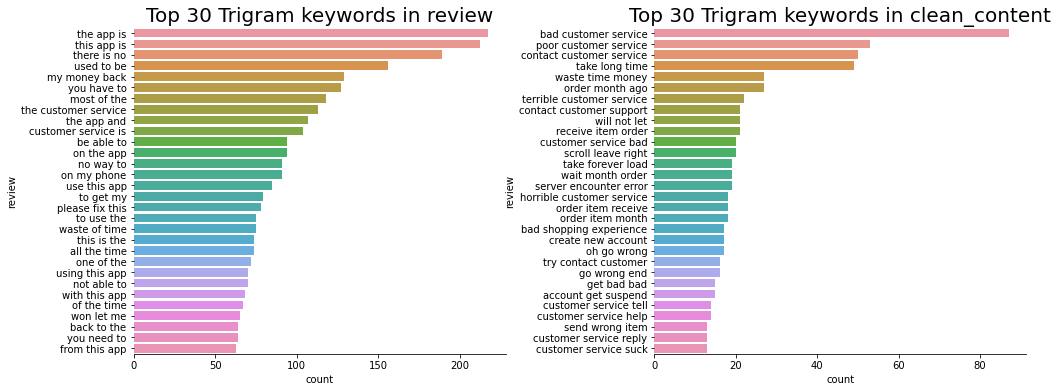

In [44]:
get_top_n_trigrams(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- Similar to the bigrams plot, Customer Service and Easy use seems to be at the top 

## Extra: Interactive plot of ratings

In [45]:
month = widgets.IntSlider(value=1.0,min=1.0,max=9.0,step=1.0,
                          description='Month:',continuous_update=False)

use_date = widgets.Checkbox(description='Date: ',value=True,)

container = widgets.HBox(children=[use_date, month])

store = widgets.Dropdown(description='Store:   ',value='apple',
                         options=df['store'].unique().tolist())

app = widgets.Dropdown(options=list(df['app'].unique()),
                       value='shoppee',description='App:',)


goodrtrace = go.Histogram(x=df[df['rating'] > 3]['rating'], opacity=0.75, name='Good reviews')
badrtrace = go.Histogram(x=df[df['rating'] <= 3]['rating'], opacity=0.75, name='Bad reviews')
inter = go.FigureWidget(data=[goodrtrace, badrtrace],
                    layout=go.Layout(
                        title=dict(
                            text='Apps Ratings'
                        ),
                        barmode='overlay'
                    ))
inter.update_layout(autosize=False,width=1000,height=500,
                margin=dict(l=50,r=50, b=100,t=100,pad=4),
                paper_bgcolor="white",);

In [46]:
def validate():
    if app.value in df['app'].unique() and store.value in df['store'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['store'] == store.value,
                               df['app'] == app.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['store'] == 'apple', df['app'] == app.value)]
            temp_df = df[filter_list]
        x1 = temp_df[temp_df['rating'] > 3]['rating']
        x2 = temp_df[temp_df['rating'] <= 3]['rating']
        with inter.batch_update():
            inter.data[0].x = x1
            inter.data[1].x = x2
            inter.layout.barmode = 'overlay'
            inter.layout.xaxis.title = 'Ratings'
            inter.layout.yaxis.title = 'Number of Reviews'


app.observe(response, names="value")
store.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [47]:
container2 = widgets.HBox([app, store])
display(widgets.VBox([container,container2,inter]))

# Topic Modeling for above average ratings (4, 5 ratings )

## Converting to list

In [48]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df[df['rating'] > 3].clean_content.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['order', 'come', 'early', 'product', 'good']]


In [49]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words],min_count = 3, threshold=5)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['order', 'come_early', 'product', 'good']


In [50]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [51]:
# Form Bigrams and Trigrams
data_words_bigrams = make_bigrams(data_words)
data_words_trigrams= make_bigrams(data_words_bigrams)
data_words_trigrams[0]

['order', 'come_early', 'product', 'good']

## LDA Modelling

In [52]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10, 
                                            random_state=42,
                                            chunksize = 10000,
                                            iterations=300,
                                            passes = 50,
                                            decay = 0.8,
                                            alpha = 'asymmetric')

pprint(lda_model.print_topics())

[(0,
  '0.235*"good" + 0.063*"product" + 0.060*"fast" + 0.056*"price" + '
  '0.035*"nice" + 0.035*"delivery" + 0.034*"quality" + 0.028*"service" + '
  '0.018*"cheap" + 0.017*"reliable"'),
 (1,
  '0.452*"great" + 0.034*"amazing" + 0.030*"excellent" + 0.029*"deal" + '
  '0.029*"place" + 0.027*"recommend" + 0.023*"cool" + 0.021*"service" + '
  '0.021*"price" + 0.020*"shop"'),
 (2,
  '0.032*"purchase" + 0.031*"item" + 0.026*"quick" + 0.025*"customer" + '
  '0.023*"delivery" + 0.018*"seller" + 0.016*"return" + 0.016*"product" + '
  '0.015*"service" + 0.013*"issue"'),
 (3,
  '0.099*"order" + 0.073*"time" + 0.045*"item" + 0.027*"receive" + '
  '0.027*"come" + 0.025*"long" + 0.020*"take" + 0.018*"wait" + 0.018*"arrive" '
  '+ 0.018*"deliver"'),
 (4,
  '0.192*"shopping" + 0.129*"good" + 0.097*"experience" + 0.075*"shop" + '
  '0.057*"far" + 0.040*"platform" + 0.034*"enjoy" + 0.031*"happy" + '
  '0.023*"well" + 0.022*"fun"'),
 (5,
  '0.093*"buy" + 0.081*"item" + 0.054*"wish" + 0.046*"thing" + 0.

## Categorizing sorted data

In [53]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
                                                                  round(prop_topic,4),
                                                                  topic_keywords]), 
                                                       ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_positive_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_positive_topic = df_topic_positive_keywords.reset_index()
df_positive_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_positive_topic['Document_No'] = df[df['rating'] > 3].index
df_positive_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.5911   
1            1             0.0              0.7345   
2            2             4.0              0.8179   
3            3             0.0              0.5045   
4            4             0.0              0.7345   
5            6             3.0              0.6458   
6            7             4.0              0.5225   
7            8             0.0              0.7343   
8            9             0.0              0.5081   
9           10             0.0              0.4407   

                                            Keywords  \
0  order, time, item, receive, come, long, take, ...   
1  good, product, fast, price, nice, delivery, qu...   
2  shopping, good, experience, shop, far, platfor...   
3  good, product, fast, price, nice, delivery, qu...   
4  good, product, fast, price, nice, delivery, qu...   
5  order, time, item, receive, come, long, take, ...   
6  shopping, good, experience, shop, far, platfor...   
7  good, product, fast, price, nice, delivery, qu...   
8  good, product, fast, price, nice, delivery, qu...   
9  good, product, fast, price, nice, delivery, qu...   

                                                Text  
0                [order, come, early, product, good]  
1                                 [good, convenient]  
2            [purchase, experience, happy, purchase]  
3                            [lot, item, good, deal]  
4                                   [delivery, fast]  
5  [new, user, set, back, payment, get, time, not...  
6                             [fun, experience, buy]  
7                                    [good, service]  
8                               [great, good, price]  
9                  [enjoy, game, helpful, efficient]

In [54]:
#Looking for examples of text for topics generated
positive = pd.DataFrame(df_positive_topic[df_positive_topic['Dominant_Topic'] == 0][:2], columns = df_positive_topic.columns)

for i in range(1,10):
    positive = positive.append(df_positive_topic[df_positive_topic['Dominant_Topic'] == i][:2])
    

positive

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
1              1             0.0              0.7345   
3              3             0.0              0.5045   
13            17             1.0              0.4115   
43            54             1.0              0.4307   
10            14             2.0              0.6874   
12            16             2.0              0.4029   
0              0             3.0              0.5911   
5              6             3.0              0.6458   
2              2             4.0              0.8179   
6              7             4.0              0.5225   
31            41             5.0              0.8157   
61            75             5.0              0.6929   
19            26             6.0              0.4155   
79            97             6.0              0.4386   
25            33             7.0              0.5818   
28            36             7.0              0.4075   
114          141             8.0              0.4946   
241          302             8.0              0.6858   
57            71             9.0              0.5265   
179          227             9.0              0.5265   

                                              Keywords  \
1    good, product, fast, price, nice, delivery, qu...   
3    good, product, fast, price, nice, delivery, qu...   
13   great, amazing, excellent, deal, place, recomm...   
43   great, amazing, excellent, deal, place, recomm...   
10   purchase, item, quick, customer, delivery, sel...   
12   purchase, item, quick, customer, delivery, sel...   
0    order, time, item, receive, come, long, take, ...   
5    order, time, item, receive, come, long, take, ...   
2    shopping, good, experience, shop, far, platfor...   
6    shopping, good, experience, shop, far, platfor...   
31   buy, item, wish, thing, stuff, sell, like, awe...   
61   buy, item, wish, thing, stuff, sell, like, awe...   
19   easy, use, user, friendly, navigate, simple, m...   
79   easy, use, user, friendly, navigate, simple, m...   
25   seller, buyer, coin, game, star, phone, review...   
28   seller, buyer, coin, game, star, phone, review...   
114  find, need, look, work, clothe, option, like, ...   
241  find, need, look, work, clothe, option, like, ...   
57   love, site, sale, straight, flash, addict, for...   
179  love, site, sale, straight, flash, addict, for...   

                                                  Text  
1                                   [good, convenient]  
3                              [lot, item, good, deal]  
13   [user, friendly, lot, discount, look, look, ba...  
43                       [easy, use, great, selection]  
10         [complicated, love, confirm, receive, item]  
12                                     [trust, shoppe]  
0                  [order, come, early, product, good]  
5    [new, user, set, back, payment, get, time, not...  
2              [purchase, experience, happy, purchase]  
6                               [fun, experience, buy]  
31                         [able, find, stuff, easily]  
61                                      [wow, awesome]  
19                                [easy, hassle, free]  
79           [user, friendly, easy, find, stuff, need]  
25   [good, mobile, development, easy, use, game, e...  
28                             [old, user, think, buy]  
114  [surprising, find, good, grocery, unique, stuf...  
241                                 [regular, shopper]  
57                                              [love]  
179                                             [love]

## WordCloud visualization

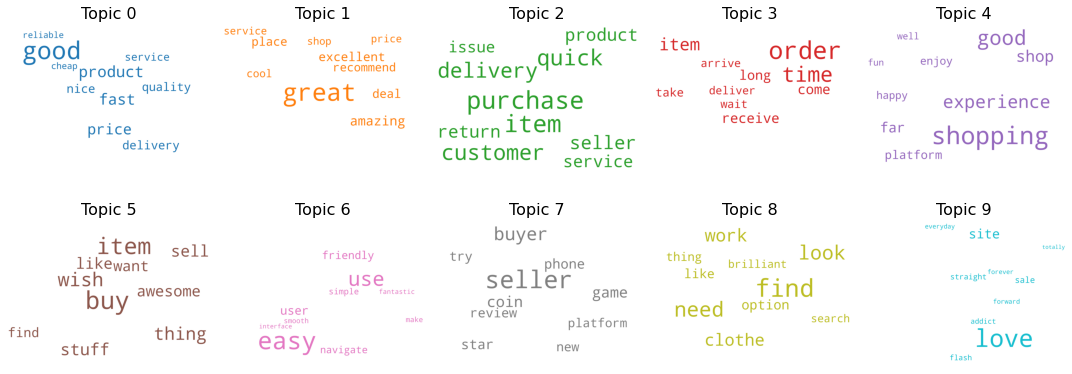

In [55]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(ncols=5, nrows = 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=-1)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Interpretation**
- From the Wordcloud, the following topics can be interpretated:
  - Topic 1: Convenient App
  - Topic 2: User Experience
  - Topic 3: Seller Feedback
  - Topic 4: Delivery
  - Topic 5: Purchase Experience
  - Topic 6: Payment
  - Topic 7: User Interface
  - Topic 8: In-App Activities
  - Topic 9: Variety & Price
  - Topic 10: Discounts & Promotions 

## Topic Charting

In [56]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.161946  0.248209       1        1  16.955763
2      0.139869  0.069583       2        1  14.310732
3      0.176953  0.062019       3        1  12.034053
5      0.203032  0.022262       4        1  11.843867
1     -0.174813  0.081685       5        1   9.580272
6     -0.146127 -0.303028       6        1   8.834947
4     -0.156079  0.197894       7        1   8.211231
7      0.160947 -0.050650       8        1   7.775869
8      0.163238 -0.117431       9        1   6.693968
9     -0.205074 -0.210543      10        1   3.759299, topic_info=          Term          Freq         Total Category  logprob  loglift
28       great   9771.000000   9771.000000  Default  30.0000  30.0000
36        love   5936.000000   5936.000000  Default  29.0000  29.0000
51        easy   7743.000000   7743.000000  Default  28.0000  28.0000
1         good  11601.000000  11601.000000  Default  27.0000  27.0000
134        use   5050.000000   5050.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
323   increase     12.999334     26.652446  Topic10  -6.4799   2.5630
194      store     41.483389    460.261668  Topic10  -5.3195   0.8744
44    discount     38.764392    428.454326  Topic10  -5.3873   0.8783
1612      word     14.320301     44.604810  Topic10  -6.3831   2.1448
460        guy     13.677344    166.790564  Topic10  -6.4290   0.7799

[574 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1074      8  0.997911  absolutely
373       2  0.870682      access
373       4  0.119368      access
2577      3  0.968322   accessory
270       8  0.996615     account
...     ...       ...         ...
64        5  0.138429        year
64        7  0.280116        year
64        8  0.179144        year
64        9  0.099343        year
222       8  0.989832         yes

[863 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 6, 2, 7, 5, 8, 9, 10])

## Insert Topic Name into Data

In [57]:
df_positive_topic['Dominant_Topic'] = df_positive_topic['Dominant_Topic'].map({0: 'Convenient App',
                                                                               1: 'User Experience',
                                                                               2: 'Seller Feedback',
                                                                               3: 'Delivery',
                                                                               4: 'Purchase Experience',
                                                                               5: 'Payment',
                                                                               6: 'User Interface',
                                                                               7: 'In-App Activities',
                                                                               8: 'Variety & Price',
                                                                               9: 'Discounts & Promotions',
                                                                               })
df_positive_topic['Dominant_Topic'].head()

0               Delivery
1         Convenient App
2    Purchase Experience
3         Convenient App
4         Convenient App
Name: Dominant_Topic, dtype: object

# Topic Modeling for below average ratings (1 - 3 ratings )

## Converting to List

In [58]:
data = df[df['rating'] <= 3].clean_content.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['stupid', 'bubble', 'game', 'impossible', 'tap', 'bubble', 'change', 'colour', 'shoot', 'stupid', 'recommend', 'star']]


In [59]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words],min_count = 3, threshold=5)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['stupid', 'bubble_game', 'impossible', 'tap', 'bubble', 'change', 'colour', 'shoot', 'stupid', 'recommend', 'star']


In [60]:
# Form Bigrams and Trigrams
data_words_bigrams = make_bigrams(data_words)
data_words_trigrams= make_bigrams(data_words_bigrams)
data_words_trigrams[0]

['stupid',
 'bubble_game',
 'impossible',
 'tap',
 'bubble',
 'change',
 'colour',
 'shoot',
 'stupid',
 'recommend',
 'star']

## LDA Modelling

In [61]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10, 
                                            random_state=42,
                                            chunksize = 10000,
                                            iterations = 100,
                                            passes = 50,
                                            alpha = 'asymmetric')

pprint(lda_model.print_topics())

[(0,
  '0.044*"item" + 0.016*"time" + 0.016*"like" + 0.016*"price" + 0.014*"good" + '
  '0.013*"want" + 0.012*"find" + 0.012*"option" + 0.011*"shopping" + '
  '0.011*"shipping"'),
 (1,
  '0.018*"account" + 0.018*"user" + 0.014*"notification" + 0.014*"listing" + '
  '0.013*"seller" + 0.011*"review" + 0.011*"use" + 0.010*"get" + '
  '0.010*"voucher" + 0.010*"time"'),
 (2,
  '0.040*"update" + 0.027*"fix" + 0.022*"work" + 0.021*"page" + 0.020*"search" '
  '+ 0.020*"load" + 0.016*"error" + 0.015*"time" + 0.014*"keep" + '
  '0.013*"message"'),
 (3,
  '0.060*"product" + 0.037*"buy" + 0.030*"cheap" + 0.029*"shipping" + '
  '0.028*"price" + 0.026*"fake" + 0.024*"sell" + 0.024*"item" + 0.024*"good" + '
  '0.023*"quality"'),
 (4,
  '0.039*"try" + 0.034*"phone" + 0.020*"account" + 0.018*"use" + '
  '0.016*"number" + 0.016*"sign" + 0.015*"game" + 0.014*"want" + 0.013*"work" '
  '+ 0.013*"say"'),
 (5,
  '0.093*"account" + 0.088*"payment" + 0.083*"card" + 0.046*"credit" + '
  '0.027*"bank" + 0.021*"c

## Categorizing sorted Data

In [62]:
df_topic_negative_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_negative_topic = df_topic_negative_keywords.reset_index()
df_negative_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_negative_topic['Document_No'] = df[df['rating'] <= 3].index
df_negative_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0           11             4.0              0.5389   
1           40             4.0              0.3152   
2           69             9.0              0.4101   
3          122             1.0              0.6192   
4          139             8.0              0.5209   
5          140             1.0              0.4701   
6          151             2.0              0.4720   
7          174             2.0              0.6593   
8          177             1.0              0.4873   
9          209             9.0              0.5357   

                                            Keywords  \
0  try, phone, account, use, number, sign, game, ...   
1  try, phone, account, use, number, sign, game, ...   
2  customer, service, bad, seller, support, dispu...   
3  account, user, notification, listing, seller, ...   
4  refund, money, item, seller, order, return, pr...   
5  account, user, notification, listing, seller, ...   
6  update, fix, work, page, search, load, error, ...   
7  update, fix, work, page, search, load, error, ...   
8  account, user, notification, listing, seller, ...   
9  customer, service, bad, seller, support, dispu...   

                                                Text  
0  [stupid, bubble, game, impossible, tap, bubble...  
1  [recent, update, shoppe, bubble, game, unplaya...  
2  [come, contact, live, chat, rep, purposely, wa...  
3  [aware, manage, beat, claim, certain, voucher,...  
4  [delete, account, receive, defective, item, se...  
5  [team, hopeless, usual, send, life, friend, bu...  
6  [hi, hard, shoot, bubble, play, bubble, pron, ...  
7    [force, close, time, hope, improvement, update]  
8                               [dumb, login, issue]  
9  [poor, customer, service, return, policy, sell...

In [63]:
#Looking for examples of text for topics generated
negative = pd.DataFrame(df_negative_topic[df_negative_topic['Dominant_Topic'] == 0][:2], columns = df_negative_topic.columns)

for i in range(1,10):
    negative = negative.append(df_negative_topic[df_negative_topic['Dominant_Topic'] == i][:2])
    

negative

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
10           236             0.0              0.5746   
15           317             0.0              0.6437   
3            122             1.0              0.6192   
5            140             1.0              0.4701   
6            151             2.0              0.4720   
7            174             2.0              0.6593   
44           585             3.0              0.5497   
45           610             3.0              0.3537   
0             11             4.0              0.5389   
1             40             4.0              0.3152   
70           951             5.0              0.2511   
73           972             5.0              0.3970   
112         1300             6.0              0.4210   
146         1699             6.0              0.5650   
20           382             7.0              0.6124   
38           541             7.0              0.4711   
4            139             8.0              0.5209   
11           277             8.0              0.7102   
2             69             9.0              0.4101   
9            209             9.0              0.5357   

                                              Keywords  \
10   item, time, like, price, good, want, find, opt...   
15   item, time, like, price, good, want, find, opt...   
3    account, user, notification, listing, seller, ...   
5    account, user, notification, listing, seller, ...   
6    update, fix, work, page, search, load, error, ...   
7    update, fix, work, page, search, load, error, ...   
44   product, buy, cheap, shipping, price, fake, se...   
45   product, buy, cheap, shipping, price, fake, se...   
0    try, phone, account, use, number, sign, game, ...   
1    try, phone, account, use, number, sign, game, ...   
70   account, payment, card, credit, bank, cash, lo...   
73   account, payment, card, credit, bank, cash, lo...   
112  not, send, order, wrong, post, item, wish, say...   
146  not, send, order, wrong, post, item, wish, say...   
20   order, month, item, receive, wait, time, refun...   
38   order, month, item, receive, wait, time, refun...   
4    refund, money, item, seller, order, return, pr...   
11   refund, money, item, seller, order, return, pr...   
2    customer, service, bad, seller, support, dispu...   
9    customer, service, bad, seller, support, dispu...   

                                                  Text  
10   [buy, thing, great, trace, shipment, compare, ...  
15   [game, rig, sale, large, discount, unpopular, ...  
3    [aware, manage, beat, claim, certain, voucher,...  
5    [team, hopeless, usual, send, life, friend, bu...  
6    [hi, hard, shoot, bubble, play, bubble, pron, ...  
7      [force, close, time, hope, improvement, update]  
44   [lousy, company, seller, send, break, faulty, ...  
45   [expect, free, cause, say, dollar, discount, o...  
0    [stupid, bubble, game, impossible, tap, bubble...  
1    [recent, update, shoppe, bubble, game, unplaya...  
70   [extremely, experience, buyer, seller, keep, a...  
73   [recently, find, payment, security, lapse, top...  
112  [will, not, let, check, status, order, uninsta...  
146  [buy, item, item, buy, blender, cost, worth, b...  
20   [fast, shipment, delivery, service, doorstep, ...  
38   [voucher, hide, agenda, spend, time, limit, re...  
4    [delete, account, receive, defective, item, se...  
11   [caution, buyer, platform, protect, seller, de...  
2    [come, contact, live, chat, rep, purposely, wa...  
9    [poor, customer, service, return, policy, sell...

## WordCloud Visualization

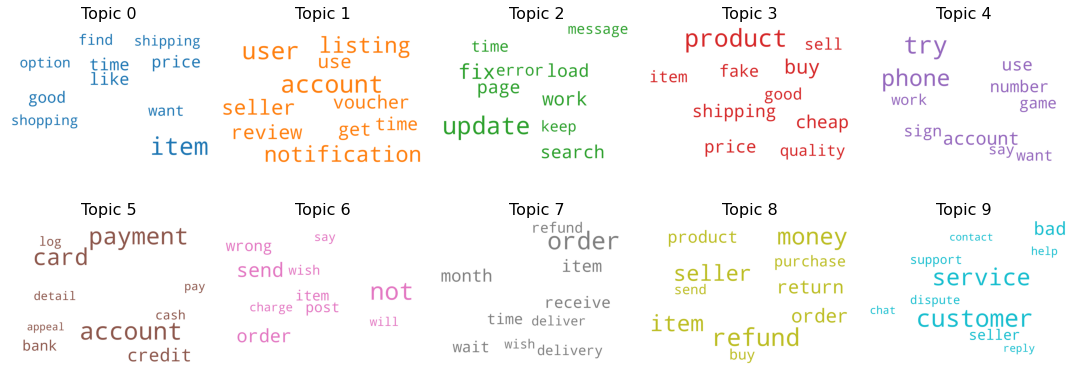

In [64]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(ncols=5,nrows = 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=-1)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Interpretation**
- From the Wordcloud, the following topics can be interpretated:
  - Topic 1: Delivery Issues
  - Topic 2: User Interface Issue
  - Topic 3: App updates Issue
  - Topic 4: Poor Quality Products
  - Topic 5: In-app Activites
  - Topic 6: Payment Issues
  - Topic 7: Delivery Issues
  - Topic 8: Purchase Experience
  - Topic 9: Refund
  - Topic 10: Customer Service

## Topic Charting

In [65]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.049687  0.152195       1        1  18.524601
7     -0.151372  0.005787       2        1  15.660271
1      0.023768 -0.027731       3        1  13.668558
2      0.111974  0.209851       4        1  13.454630
8     -0.145595 -0.063330       5        1  10.122142
3     -0.169728  0.074734       6        1   7.574622
4      0.188729  0.075619       7        1   7.179393
9     -0.050184 -0.278120       8        1   6.348380
6     -0.046890 -0.011595       9        1   4.365306
5      0.288985 -0.137410      10        1   3.102096, topic_info=          Term         Freq        Total Category  logprob  loglift
298      order  3098.000000  3098.000000  Default  30.0000  30.0000
75    customer  1393.000000  1393.000000  Default  29.0000  29.0000
138    service  1259.000000  1259.000000  Default  28.0000  28.0000
542    account  1105.000000  1105.000000  Default  27.0000  27.0000
89      refund  1403.000000  1403.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1048    reason    33.266856   283.886076  Topic10  -5.0194   1.3291
156     delete    35.695197   380.713692  Topic10  -4.9490   1.1061
752       wish    41.469493  1006.092778  Topic10  -4.7991   0.2842
298      order    36.598260  3098.454765  Topic10  -4.9240  -0.9656
44         say    29.731785   852.575765  Topic10  -5.1318   0.1170

[688 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4539      2  0.126642   absolute
4539      3  0.075985   absolute
4539      7  0.759854   absolute
534       1  0.209437     access
534       3  0.104719     access
...     ...       ...        ...
777       5  0.059864       year
777       9  0.015617       year
1798      9  0.967017  yesterday
2237      1  0.967290         yo
5726      4  0.985486       zoom

[1364 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 2, 3, 9, 4, 5, 10, 7, 6])

## Insert Topic Name into Data

In [66]:
df_negative_topic['Dominant_Topic'] = df_negative_topic['Dominant_Topic'].map({0: 'Delivery Issue',
                                                                               1: 'User Interface Issue',
                                                                               2: 'App updates Issue',
                                                                               3: 'Poor Quality Products',
                                                                               4: 'In-app Activites',
                                                                               5: 'Payment Issues',
                                                                               6: 'Delivery Issues',
                                                                               7: 'Purchase Experience',
                                                                               8: 'Refund',
                                                                               9: 'Customer Service'
                                                                               })
df_negative_topic['Dominant_Topic'].head()

0        In-app Activites
1        In-app Activites
2        Customer Service
3    User Interface Issue
4                  Refund
Name: Dominant_Topic, dtype: object

## Combining topic category with df

In [67]:
topics_df = pd.concat([df_positive_topic, df_negative_topic], ignore_index = True).set_index('Document_No').sort_index()

In [68]:
topics_df.shape

(56970, 4)

In [69]:
df['category'] = topics_df['Dominant_Topic']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56970 entries, 0 to 74684
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rating          56970 non-null  int64         
 1   date            56970 non-null  datetime64[ns]
 2   app             56970 non-null  object        
 3   store           56970 non-null  object        
 4   review          56970 non-null  object        
 5   clean_content   56970 non-null  object        
 6   adj             47436 non-null  object        
 7   noun            46960 non-null  object        
 8   verb            39492 non-null  object        
 9   emoji           3729 non-null   object        
 10  neg_score       56970 non-null  float64       
 11  neu_score       56970 non-null  float64       
 12  pos_score       56970 non-null  float64       
 13  compound_score  56970 non-null  float64       
 14  language        56970 non-null  object        
 15  mo

# EDA for LDA Topics

## Distribution Across Topics

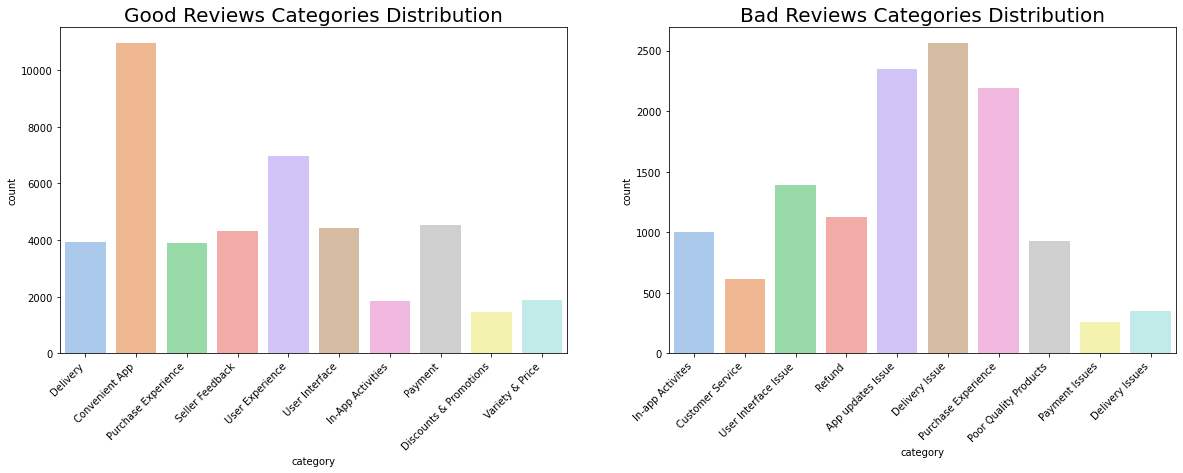

In [71]:
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.countplot(x = 'category', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha= 'right')
ax[0].set_title('Good Reviews Categories Distribution', fontsize = 20)
sns.countplot(x = 'category', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha= 'right')
ax[1].set_title('Bad Reviews Categories Distribution', fontsize = 20);

**Remarks**
- Good Reviews are mostly on Convenient App and User Experience
- Bad reviews are mostly on App Updates, Delivery and Purchase Experience

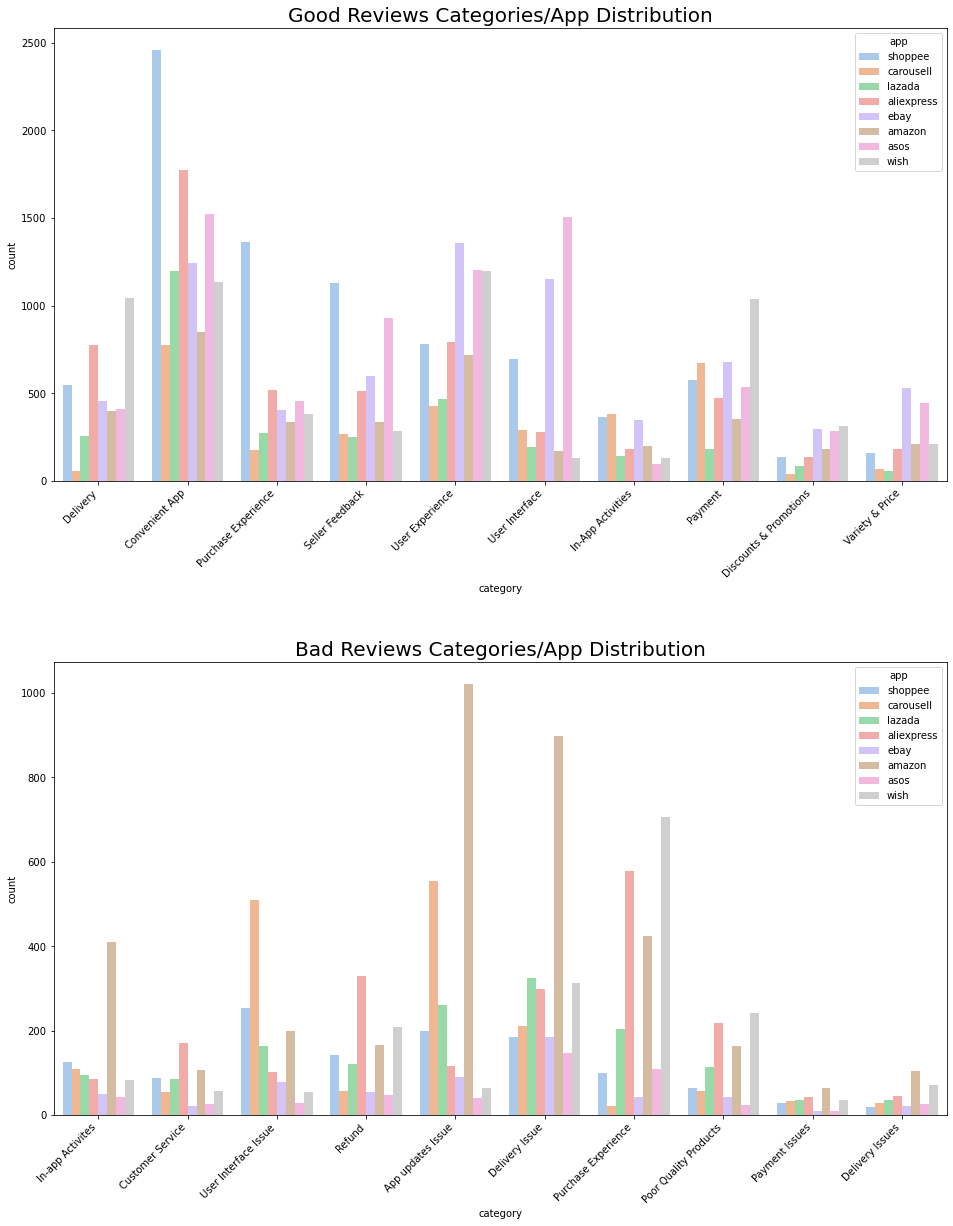

In [72]:
fig, ax = plt.subplots(2,1, figsize = (16, 20))
plt.subplots_adjust(hspace = 0.4)
sns.countplot(x = 'category', hue = 'app', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_title('Good Reviews Categories/App Distribution', fontsize = 20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha= 'right')

sns.countplot(x = 'category', hue = 'app', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_title('Bad Reviews Categories/App Distribution', fontsize = 20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45,  ha= 'right');

**Remarks**
- Amazon seems to take the lead in having more bad reviews as compared to the other apps, especially App Updates and Delivery issue
- Wish has slightly higher negative Purchase Experience reviews
- AliExpress has High Refund issues. 
- Shoppee takes the lead in Convenient app while ASOS takes the lead for User Interface

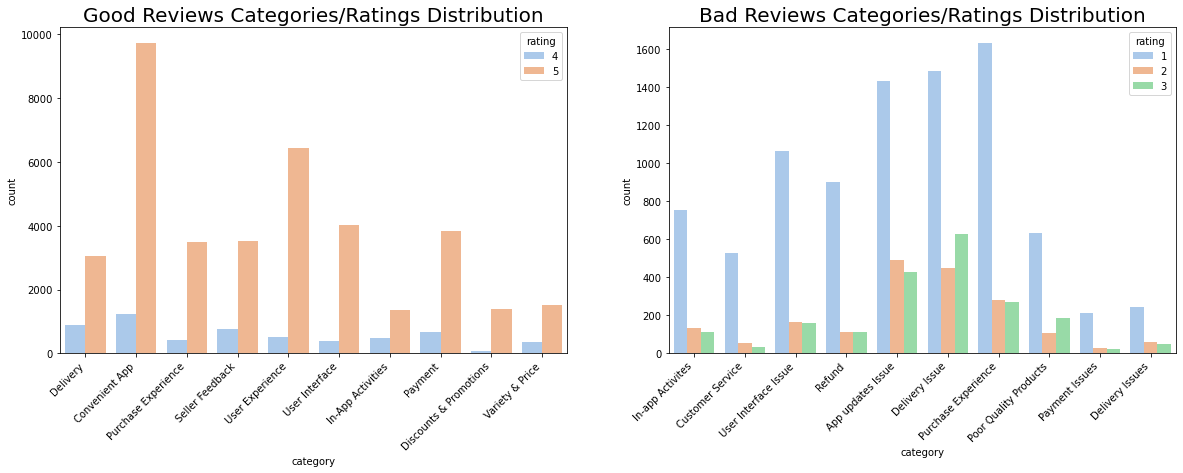

In [73]:
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.countplot(x = 'category', hue = 'rating', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_title('Good Reviews Categories/Ratings Distribution', fontsize = 20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha= 'right')

sns.countplot(x = 'category', hue = 'rating', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_title('Bad Reviews Categories/Ratings Distribution', fontsize = 20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha= 'right');

**Remarks**
- Users the wants to give a bad review will tend to just give a 1 rating
- Users that wants to give a good review will tend to just give a 5 rating

## Distribution of Rating for Month and Week

In [74]:
def plot_countplots_time_cat(df, date_features, scoring):
    nrows = int(np.ceil(len(date_features)))
    fig,ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    
    for i in range(len(date_features)):
        ax[i].set_title(f'Count of {date_features[i]} across Shopping reviews {scoring}', fontdict = {'fontsize': 20})
        g = sns.countplot(x = date_features[i] , data = df, ax=ax[i], color = 'grey')
        g2 = g.twinx()
        
        g2 = sns.pointplot(x = date_features[i],
                           y = scoring,
                           hue = 'category',
                           data = df,
                           errwidth = 0,
                           ax=g2)
        
        plt.legend()
    plt.show()

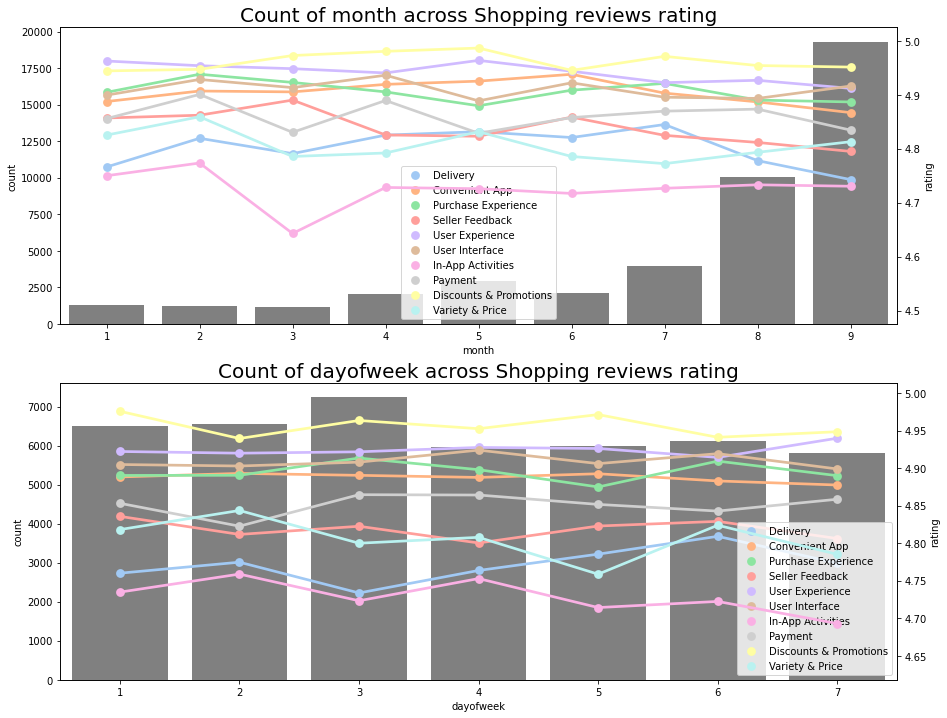

In [75]:
plot_countplots_time_cat(df[df['rating'] >3] , ['month', 'dayofweek'], 'rating')

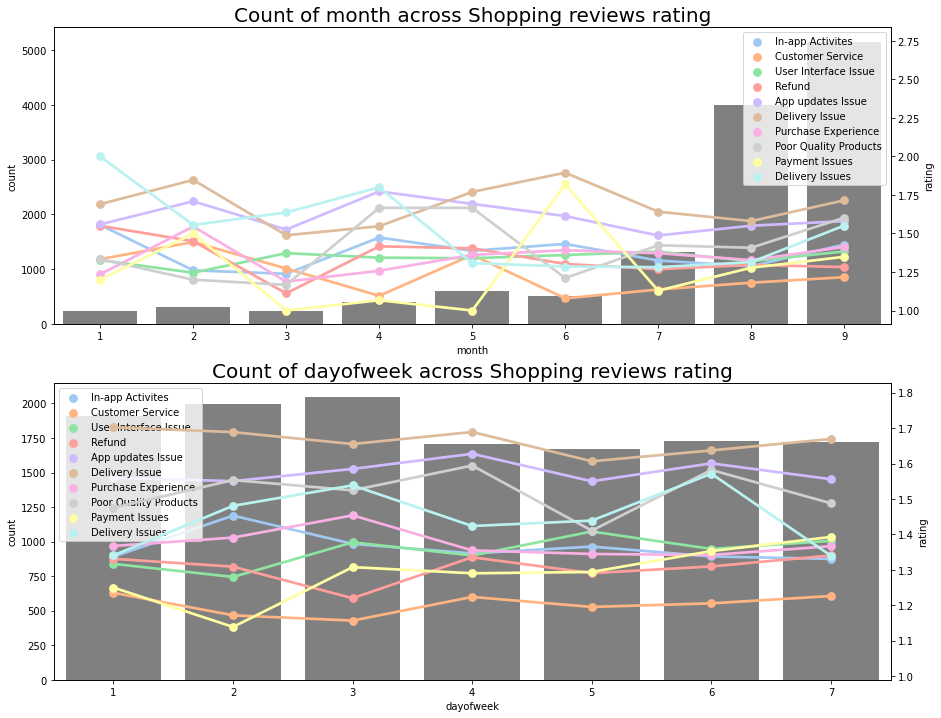

In [76]:
plot_countplots_time_cat(df[df['rating'] <= 3] , ['month', 'dayofweek'], 'rating')

## Distribution of Compound Score for Month and Week

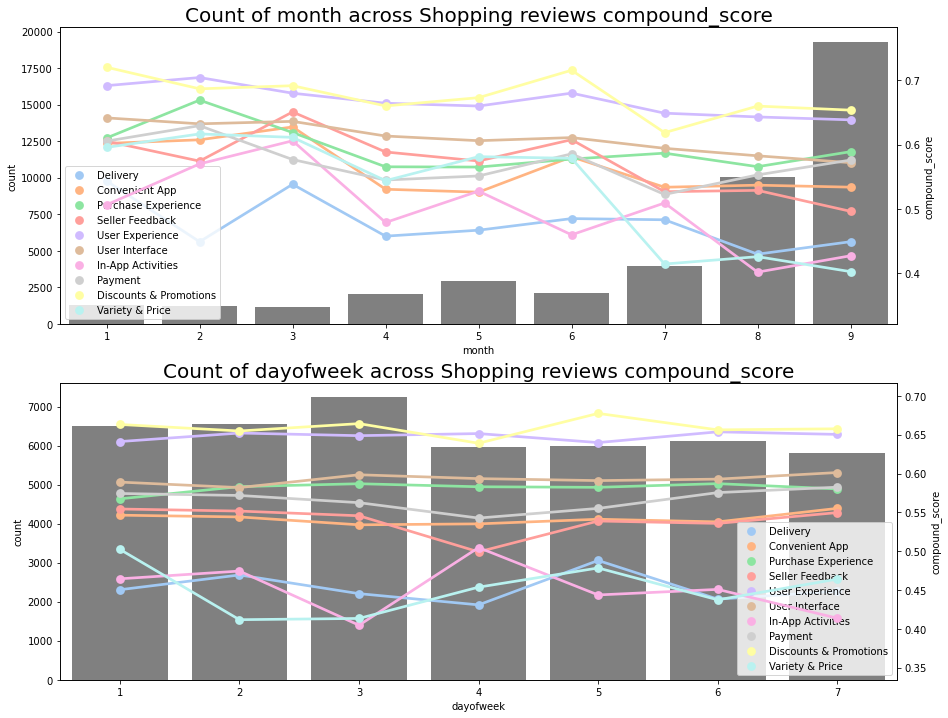

In [77]:
plot_countplots_time_cat(df[df['rating'] > 3] , ['month', 'dayofweek'], 'compound_score')

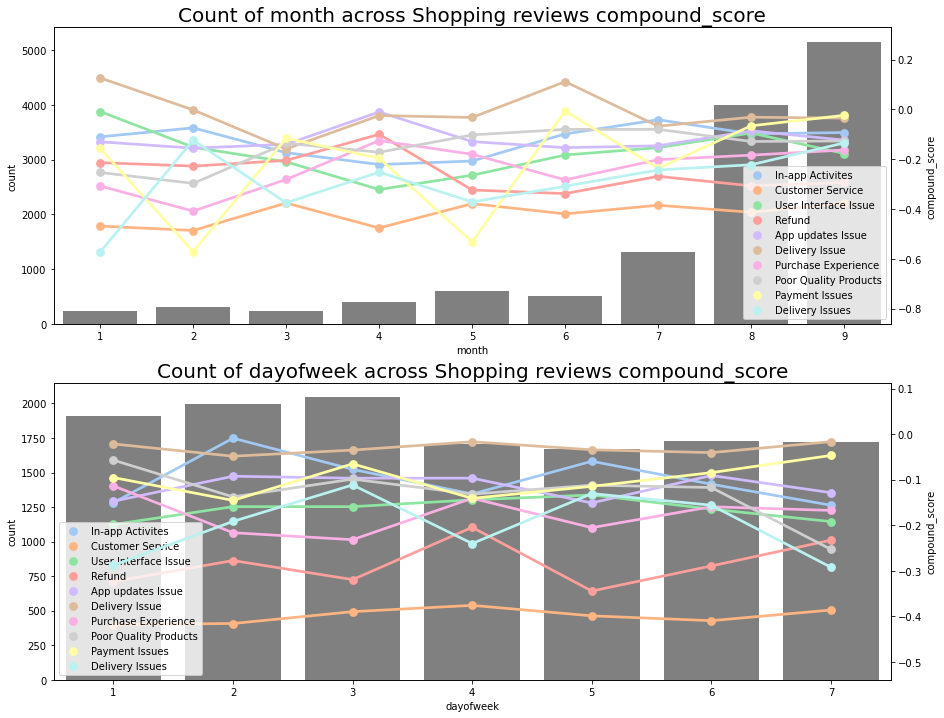

In [78]:
plot_countplots_time_cat(df[df['rating'] <= 3] , ['month', 'dayofweek'], 'compound_score')

**Remarks**
- Payment Issues seems to have a dip in negative rating in February, March and April.
- There is a Slight dip of rating for Refund in March
- Base on compound scores, Customer Service tend to be very low as compared to other categories.

# Exporting Data for Modelling

In [79]:
df.to_csv('../data/reviews_Model.csv', index=None, header=True)